
# Project: E-Commerce Online Retail Problem


# Problem Description
EDA on E-Commerce Online Retail dataset

link: https://www.kaggle.com/carrie1/ecommerce-data



# Libraries 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


# Read Dataset

In [4]:
df = pd.read_csv('data.csv' , encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [6]:
df.shape


(541909, 8)

In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


# Understanding Data

# Context

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

# Variable Description

InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product code that consists 5 digits.

Description: Product name.

Quantity: The quantities of each product per transaction.

InvoiceDate: Represents the day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.

Country: Name of the country where each customer resides

# EDA

In [8]:
missing_percentage = df.isnull().mean() * 50
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.134155
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     12.463347
Country         0.000000
dtype: float64

In [9]:
#remove nulls value
df = df.dropna(subset=['CustomerID'])


In [10]:
df.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Q1: Which Country makes the most transactions?

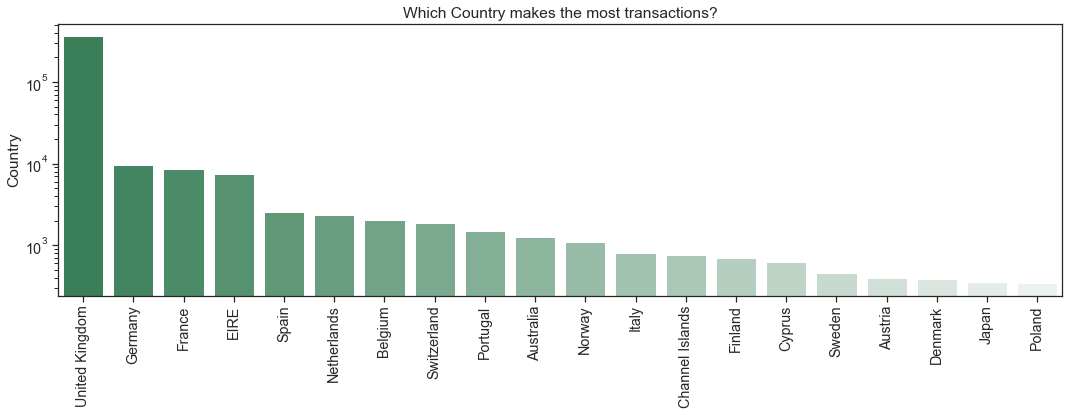

In [18]:
sns.set_style('ticks')
plt.figure(figsize=(18,5));
#data =df.Country.value_counts()[:20]
data = df['Country'].value_counts()[:20].sort_values(ascending=False)
pal = sns.light_palette("seagreen",n_colors=len(data))
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1]))

plt.title('Which Country makes the most transactions?')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()
#location = df['Country'].value_counts()[:20]
#loation.plot(kind='bar', color="green", title= 'Which Country makes the most transactions?', figsize=(20,5))

## Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row


In [13]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
df_top_c = {'CustomerID':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].index,
            'Revenue':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].values}
df_top_c= pd.DataFrame(df_top_c)
df_top_c

<ipython-input-13-33fb7cc49d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity']*df['UnitPrice']


,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


## Q3: Show Top 5 frequent Customers


In [14]:
df['Frequency'] = df['CustomerID'].value_counts()[:5]
df_top_c2 = df.groupby(['CustomerID']).agg(
    {"Frequency": len}).sort_values("Frequency", ascending=False).head(5).reset_index()
df_top_c2

<ipython-input-14-0de92cf7b7a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'] = df['CustomerID'].value_counts()[:5]


,CustomerID,Frequency
0,17841,7983.0
1,14911,5903.0
2,14096,5128.0
3,12748,4642.0
4,14606,2782.0


In [15]:
f"{df.shape[0]:,}"

'406,829'

## Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏¶


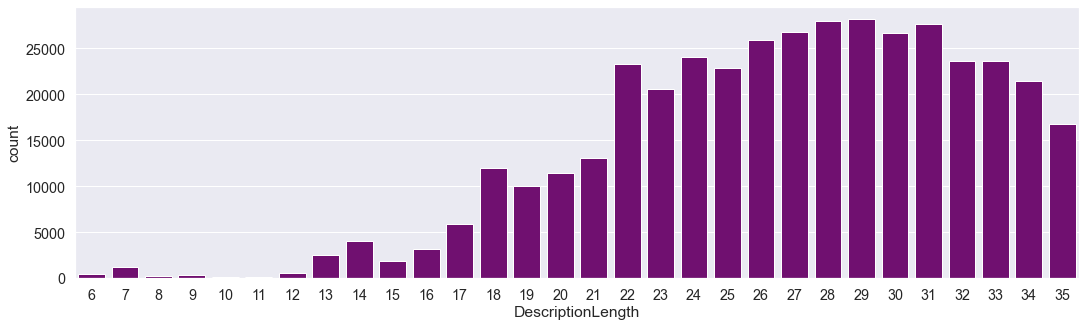

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,5))
data =df.Description.apply(len).value_counts()
sns.barplot(x=data.index, y=data ,color="purple")
plt.xlabel('DescriptionLength')
plt.ylabel('count')     
plt.show()


In [17]:
df.drop('Frequency', axis=1, inplace=True)
df.head(2)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature


In [ ]:
import datetime

df.InvoiceDate = pd.to_datetime(df['InvoiceDate'])
df["Year"] =df.InvoiceDate.dt.year 
df["Quarter"] =df.InvoiceDate.dt.quarter 
df["Month"] =df.InvoiceDate.dt.month 
df["Week"] = df.InvoiceDate.dt.week
df["Weekday"] = df.InvoiceDate.dt.dayofweek
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df["Date"] = df.InvoiceDate.dt.date
df.head()

## Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [ ]:
grouped_features = ['Date','Year','Quarter','Month','Week','Weekday','Dayofyear','Day','StockCode']
df.groupby(grouped_features,as_index=False)[['Quantity','Revenue']].sum().head()


## Agglomerative Hierarchical Clustering Algorithm


In [16]:
df = df.drop(labels=range(301, 541909), axis=0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
296,536397,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-12-01 10:51:00,4.65,17924,United Kingdom
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-01 10:51:00,4.65,17924,United Kingdom
298,536398,21980,PACK OF 12 RED RETROSPOT TISSUES,24,2010-12-01 10:52:00,0.29,13448,United Kingdom
299,536398,21844,RED RETROSPOT MUG,6,2010-12-01 10:52:00,2.95,13448,United Kingdom


In [17]:
data = df.iloc[:, [3,5]].values

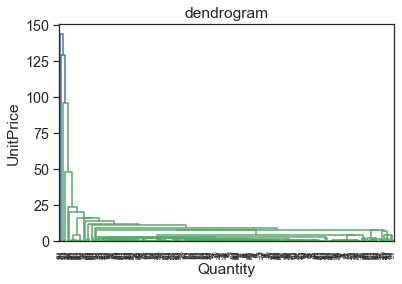

In [18]:
dendrogram= sch.dendrogram(sch.linkage(data,'single'))
plt.title('dendrogram')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [19]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='single')
cluster.fit_predict(data)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Text(0, 0.5, 'UnitPrice')

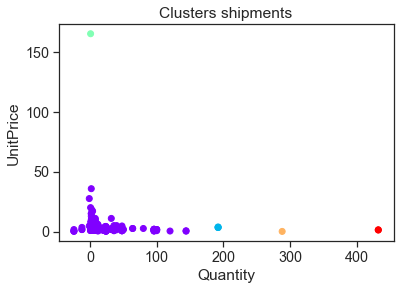

In [20]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Clusters shipments')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')